In [ ]:
import os
import json
import pandas as pd
import numpy as np

directory_path = 'tmp'
model_folders = os.listdir(directory_path)

model_folders.remove(".git")
model_folders.remove("line_counts.txt")
model_folders.remove("linear_probe_8")
model_folders.remove("linear_probe_16")
model_folders.remove("linear_probe_32")
model_folders.remove("linear_probe_64")
model_folders.remove("linear_probe_128")
model_folders.remove("linear_probe_256")

sts_task_list = ["STS12VisualSTS.json",
                 "STS13VisualSTS.json",
                 "STS14VisualSTS.json",
                 "STS15VisualSTS.json",
                 "STS16VisualSTS.json",
                 "STS17MultilingualVisualSTS.json",
                 "STSBenchmarkMultilingualVisualSTS.json"]

In [ ]:
# get all results from visual STS

all_results = []
for model in model_folders:
    version = os.listdir(os.path.join(directory_path,model))[0]
    task_results = os.listdir(os.path.join(directory_path,model,version))

    all_result = True
    for name in sts_task_list:
        if not name in task_results:
            all_result = False
    if all_result:
        extracted_results = []
        for name in sts_task_list:
            with open(os.path.join(directory_path,model,version,name),"r") as file:
                results = json.load(file)
                test_results = results["scores"]["test"]
                
                if len(test_results)>1:
                    extracted_result = []
                    for subset_result in test_results:
                        extracted_result.append([subset_result["hf_subset"],subset_result["cosine_spearman"]])
                else:
                    extracted_result=test_results[0]["cosine_spearman"]
            extracted_results.append(extracted_result)
        all_results.append([model, extracted_results])
sts_english = []
for all_result in all_results:
    result = all_result[1]
    sts_english_single = result[:5] + [x[1] for x in result[5] if x[0] == "en-en"] + [x[1] for x in result[6] if x[0] == "en"]
    sts_english.append([all_result[0]]+sts_english_single)

column_names = ["model name","STS12","STS13","STS14","STS15","STS16","STS17","STS-b"]
english_frame = pd.DataFrame(sts_english, columns=column_names)

In [11]:
# the stats are taken from the cambrian-1 paper.
data = [
    {
        "Model": "openai__clip-vit-large-patch14",
        "Average": 50.49,
        "MMEP": 1476.65,
        "MMB": 61.96,
        "SEED": 65.45,
        "GQA": 62.78,
        "SQA": 69.06,
        "MMMUv": 35.00,
        "MathVistaM": 29.50,
        "AI2D": 58.94,
        "ChartQA": 37.84,
        "OCRBench": 30.90,
        "TextVQA": 58.21,
        "DocVQA": 32.11,
        "MMVP": 28.66,
        "RealWorldQA": 54.90,
        "CV-Bench2D": 54.14,
        "CV-Bench3D": 54.60
    },
    {
        "Model": 'EVA02-CLIP-L-14',
        "Average": 49.17,
        "MMEP": 1449.78,
        "MMB": 64.00,
        "SEED": 67.53,
        "GQA": 63.60,
        "SQA": 69.91,
        "MMMUv": 35.49,
        "MathVistaM": 28.40,
        "AI2D": 59.16,
        "ChartQA": 24.76,
        "OCRBench": 27.10,
        "TextVQA": 55.39,
        "DocVQA": 21.63,
        "MMVP": 34.67,
        "RealWorldQA": 55.69,
        "CV-Bench2D": 57.83,
        "CV-Bench3D": 57.75
    },
    {
        "Model": 'google__siglip-large-patch16-384',
        "Average": 50.87,
        "MMEP": 1424.20,
        "MMB": 59.40,
        "SEED": 65.48,
        "GQA": 62.56,
        "SQA": 68.67,
        "MMMUv": 35.99,
        "MathVistaM": 29.70,
        "AI2D": 59.29,
        "ChartQA": 40.52,
        "OCRBench": 33.50,
        "TextVQA": 59.59,
        "DocVQA": 35.30,
        "MMVP": 28.00,
        "RealWorldQA": 53.33,
        "CV-Bench2D": 55.42,
        "CV-Bench3D": 56.08
    },
    {
        "Model": 'google__siglip-so400m-patch14-384',
        "Average": 53.91,
        "MMEP": 1455.64,
        "MMB": 63.66,
        "SEED": 67.62,
        "GQA": 63.70,
        "SQA": 72.10,
        "MMMUv": 36.09,
        "MathVistaM": 29.30,
        "AI2D": 61.59,
        "ChartQA": 43.76,
        "OCRBench": 37.20,
        "TextVQA": 61.82,
        "DocVQA": 40.19,
        "MMVP": 36.60,
        "RealWorldQA": 56.99,
        "CV-Bench2D": 59.61,
        "CV-Bench3D": 59.58
    },
    {
        "Model": 'facebook__dinov2-large',
        "Average": 41.85,
        "MMEP": 1190.81,
        "MMB": 51.83,
        "SEED": 56.90,
        "GQA": 60.38,
        "SQA": 66.04,
        "MMMUv": 34.20,
        "MathVistaM": 27.40,
        "AI2D": 56.41,
        "ChartQA": 16.44,
        "OCRBench": 3.30,
        "TextVQA": 45.12,
        "DocVQA": 11.79,
        "MMVP": 21.33,
        "RealWorldQA": 49.67,
        "CV-Bench2D": 53.91,
        "CV-Bench3D": 55.33
    },
    {
        "Model": 'nyu-visionx__moco-v3-vit-b',
        "Average": 38.82,
        "MMEP": 1129.32,
        "MMB": 41.62,
        "SEED": 52.19,
        "GQA": 55.03,
        "SQA": 65.89,
        "MMMUv": 33.30,
        "MathVistaM": 28.30,
        "AI2D": 56.44,
        "ChartQA": 16.48,
        "OCRBench": 3.00,
        "TextVQA": 44.09,
        "DocVQA": 11.47,
        "MMVP": 12.00,
        "RealWorldQA": 47.58,
        "CV-Bench2D": 45.17,
        "CV-Bench3D": 53.00
    },
    {
        "Model": 'nyu-visionx__moco-v3-vit-l',
        "Average": 37.07,
        "MMEP": 1015.20,
        "MMB": 37.28,
        "SEED": 48.31,
        "GQA": 52.63,
        "SQA": 65.49,
        "MMMUv": 34.50,
        "MathVistaM": 27.60,
        "AI2D": 55.41,
        "ChartQA": 16.92,
        "OCRBench": 3.10,
        "TextVQA": 43.57,
        "DocVQA": 11.50,
        "MMVP": 14.67,
        "RealWorldQA": 45.49,
        "CV-Bench2D": 45.17,
        "CV-Bench3D": 40.75
    }
]

In [ ]:
# get models that were tested in cambrian one paper

df = pd.DataFrame(data)
model_names = [x["Model"] for x in data]
filtered_sts = english_frame[english_frame["model name"].isin(model_names)]
filtered_sts["model name"] = pd.Categorical(filtered_sts["model name"], categories=model_names, ordered=True)
filtered_sts = filtered_sts.sort_values("model name").reset_index(drop=True)
filtered_sts = filtered_sts.rename(columns = {"model name":"Model"})

In [ ]:
# calculate correlation

A = df.values[:,1:]
B = filtered_sts.values[:,1:]
A = np.array(A, dtype=float)
B = np.array(B, dtype=float)
# Standardize each column (task) in A and B across the models
A_standardized = (A - A.mean(axis=0, keepdims=True)) / A.std(axis=0, keepdims=True)
B_standardized = (B - B.mean(axis=0, keepdims=True)) / B.std(axis=0, keepdims=True)

# Compute the correlation matrix as the dot product of the transposed matrices
correlation_matrix = np.dot(A_standardized.T, B_standardized) / A.shape[0]

In [ ]:
all_mllm_tasks = [
 "Average",
 'MMEP',
 'MMB',
 'SEED',
 'GQA',
 'SQA',
 'MMMUv',
 'MathVistaM',
 'AI2D',
 'ChartQA',
 'OCRBench',
 'TextVQA',
 'DocVQA',
 'MMVP',
 'RealWorldQA',
 'CV-Bench2D',
 'CV-Bench3D']

correlation_matrix = pd.DataFrame(correlation_matrix, 
                                  index=all_mllm_tasks, 
                                  columns=['STS12', 'STS13', 'STS14', 'STS15', 'STS16', 'STS17', 'STS-b'])

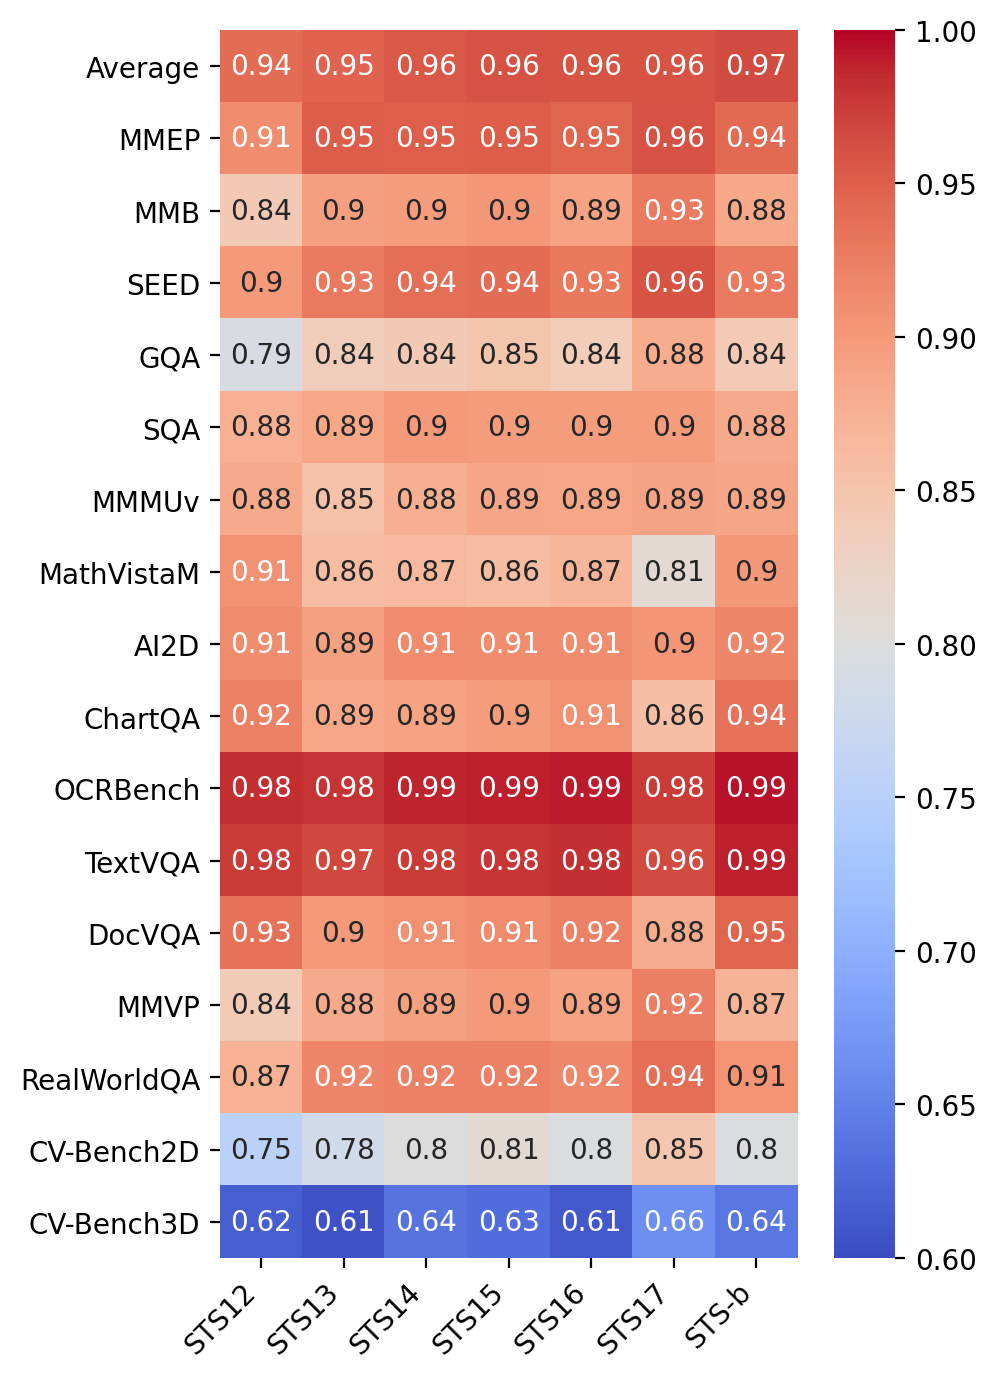

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 7),dpi=200)

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=0.6, vmax=1, center=0.8, annot_kws={"size": 10})
# plt.title("Correlation Matrix Heatmap")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.yticks(rotation=0)  # Keep y-axis labels horizontal

# Show the plot
plt.tight_layout()
# plt.show()
plt.savefig("correlation_small2.pdf")